In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df =pd.read_csv('movieDB_API_movies_w_gross_profits.csv')

In [16]:
df.sort_values(by='gross_profit',ascending=False).head(1)

,Unnamed: 0,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit
1113,1113,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,tt0499549,36.566,2009-12-10,2787965087,162.0,Avatar,7.4,20391,2.550965e+09


##  Create subset to filter out movies with no known gross profit

In [17]:
movies_with_gross_profit = df[df['gross_profit'] != 0]

## Analyzing length of movie and movie profit

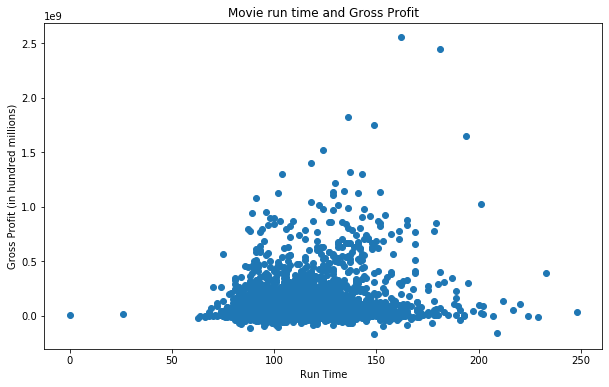

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(movies_with_gross_profit['runtime'],movies_with_gross_profit['gross_profit']);
plt.title('Movie run time and Gross Profit')
plt.xlabel('Run Time')
plt.ylabel('Gross Profit (in hundred millions)')
plt.show()


In [27]:
# looks like we can find a perfect movie length.... look further...

## Analyzing release month and gross profit

1. Is there a month where people will spend more to watch a movie? 
2. Maybe we should release our film during a specific time of the year?

In [32]:
# Creating pandas datetime from the release date string
movies_with_gross_profit['release_date'] = pd.to_datetime(movies_with_gross_profit['release_date'])

In [41]:
# Adding column for the month of year it was released
movies_with_gross_profit['release_month'] = pd.DatetimeIndex(movies_with_gross_profit['release_date']).month

In [51]:
# creating table for the plot
grouped_by_month = movies_with_gross_profit.groupby(['release_month']).mean().reset_index()
month_and_gp =grouped_by_month[['release_month','gross_profit']]
month_and_gp

,release_month,gross_profit
0,1,4.318331e+07
1,2,6.030782e+07
2,3,7.743303e+07
3,4,8.725812e+07
4,5,1.334785e+08
5,6,1.410546e+08
6,7,1.078288e+08
7,8,4.811661e+07
8,9,3.912906e+07
9,10,6.203410e+07


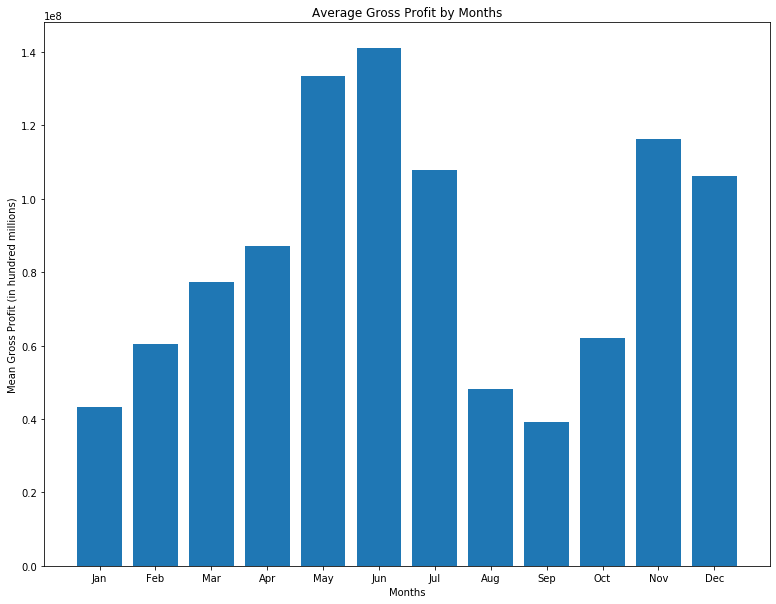

In [72]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_gp['gross_profit']);
plt.xlabel('Months')
plt.ylabel('Mean Gross Profit (in hundred millions)')
plt.title('Average Gross Profit by Months')
plt.show()

Looks like movies which are released in early summer (June) have a better gross profit

Lets see if this theory holds true for revenue (sales)

In [69]:
# repeating process for revenue
grouped_by_month = movies_with_gross_profit.groupby(['release_month']).mean().reset_index()
month_and_r =grouped_by_month[['release_month','revenue']]
month_and_r

,release_month,revenue
0,1,4.142480e+07
1,2,5.500483e+07
2,3,7.206587e+07
3,4,7.525711e+07
4,5,1.231946e+08
5,6,1.353728e+08
6,7,1.046022e+08
7,8,5.352637e+07
8,9,4.004470e+07
9,10,5.615788e+07


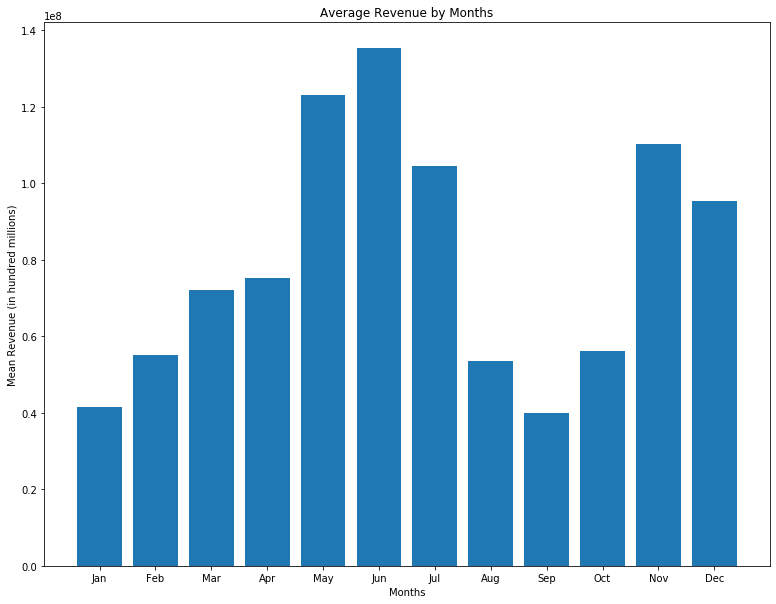

In [71]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_r['revenue']);
plt.xlabel('Months')
plt.ylabel('Mean Revenue (in hundred millions)')
plt.title('Average Revenue by Months')
plt.show()

Indeed! Movies released in June have the highest revenue! cool